In [125]:
'''
Python code that selects the analysis area by loading the image, corrects it through black and white, brightness, saturation, and contrast methods, visualizes the gray scale image processing histogram to check the scale distribution, and obtains the size of the white area.
'''

'\nPython code that selects the analysis area by loading the image, corrects it through black and white, brightness, saturation, and contrast methods, visualizes the gray scale image processing histogram to check the scale distribution, and obtains the size of the white area.\n'

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
img_path = 'C:/users/user/desktop/capstone/data/02_imgs/09.08/root2_220818'

In [6]:
# Load the image
img = cv2.imread(img_path + '/' +'root2_220821002925.jpg', cv2.IMREAD_COLOR)
cropped = img[100:1080, 700:1500]

In [11]:
if img is None:
    print("Error loading image")
else:
    print("Image shape:", img.shape)
    cv2.imshow("root", cropped)
    cv2.waitKey(0)
    
    cv2.destroyAllWindows()

Image shape: (1080, 1980, 3)


In [9]:
# Convert to grayscale
gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

In [12]:
if img is None:
    print("Error loading image")
else:
    print("Image shape:", img.shape)
    cv2.imshow("root", gray)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Image shape: (1080, 1980, 3)


In [13]:
def adjust_brightness_saturation_contrast(gray, brightness=1.5, saturation=2, contrast=50):
    gray = cv2.addWeighted(gray, brightness, np.zeros(gray.shape, dtype=gray.dtype), 0, contrast) 
    gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2HSV)
    gray[..., 1] = gray[..., 1] * saturation
    gray = cv2.cvtColor(gray, cv2.COLOR_HSV2BGR)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
    return gray

In [30]:
gray = adjust_brightness_saturation_contrast(gray, brightness=3, saturation=2, contrast=10)

In [32]:
if img is None:
    print("Error loading image")
else:
    print("Image shape:", img.shape)
    cv2.imshow("root", gray)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
#gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY) # 보정 전으로 초기화

Image shape: (1080, 1980, 3)


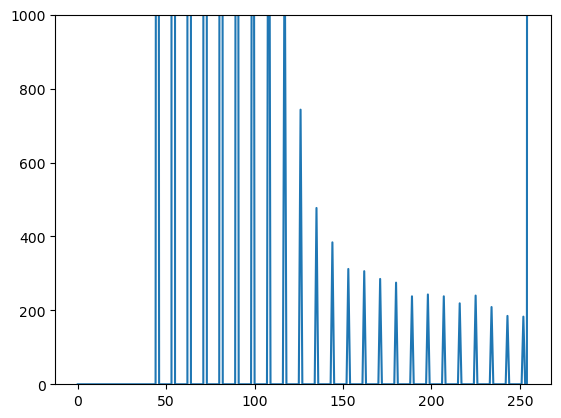

In [27]:
# Visualize the grayscale histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.plot(hist)
plt.ylim([0,1000])
plt.show()

In [28]:
# Threshold the image to get binary image
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

In [29]:
# Obtain the size of the white area
white_pixels = cv2.countNonZero(binary)
print("Size of white area:", white_pixels)

Size of white area: 19995
